Initial value of a:  tensor([0.3367], requires_grad=True)
Initial value of b:  tensor([0.1288], requires_grad=True)


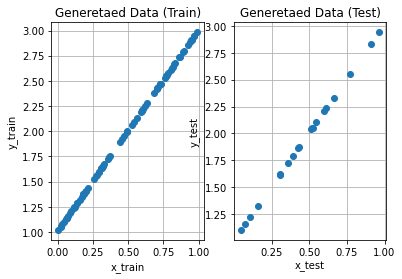

In [34]:
#Linear Regression by Rozita using tensors (To be able to run on GPU), 9/15/2021 
# y=a+bx

import torch
torch.cuda.is_available() #avaiablity of GPU on your device
torch.cuda.get_device_properties('cuda:0') #GPU properties, You may see this alot in GoogleClab


import numpy as np #------------------------------------------------------------------------------------------------------------

#1- generate data (x,y) pairs using y=1+2x+n so that n is a gaussian noise
np.random.seed(42)  # makes the random numbers predictable (a and b will not change every time you run the program)
x=np.random.rand(1,100) #generate randome numbers between 1 and 100
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

#shuffle the indices
idx = np.arange(100) 
np.random.shuffle(idx) #Modify a sequence in-place by shuffling its contents.


#creat train and test or validation dataset 
#using first 80 random indices for train and using the remaining indices for validation
x_train, y_train=x[0,idx[:80]], y[0,idx[:80]]
x_test, y_test=x[0,idx[80:]], y[0,idx[80:]]

# Converts numpy arrays to tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

x_test = torch.from_numpy(x_test)
y_test= torch.from_numpy(y_test)

#plot data using matplotlib #---------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(x_train, y_train, 'o')
plt.title('Generetaed Data (Train)')
plt.grid()
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.subplot(1,2,2)

plt.plot(x_test, y_test, 'o')
plt.title('Generetaed Data (Test)')
plt.grid()
plt.xlabel('x_test')
plt.ylabel('y_test')

# gradient Descent, Repeat four steps until loss gets very small #-------------------------------------------------------------

#we need to generate random a and b to caculate predicted model
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True) # requires_grad is true Cuz a is a parameter 
b = torch.randn(1, requires_grad=True)

print('Initial value of a: ', a)
print('Initial value of b: ', b)
    
# Sets learning rate
lr = 1e-1

# Defines optimizer
optimizer = torch.optim.SGD([a, b], lr=lr)

# Defines MSE loss
#lossMSE = torch.nn.MSELoss()
Loss_fn=torch.nn.MSELoss()


# Defines number of epochs
n_epochs = 1000
for epoch in range(n_epochs):
    
    #step 1= compute pridicted values of our model:
    #we have to input x_train  and compute y_pred, 
    yhat=b*x_train+a   
    
    #step 2= caculate loss fucntion using MSE
    
    LossMSE=Loss_fn(yhat,y_train) # simple!
    #difficult way
    #error=y_train-y
    #LossMSE=(error**2).mean()
    #print(LossMSE)

    #step 3= calculate gradient
    LossMSE.backward()  # simple!
    
    # difficult way
    #a_grad = -2 * error.mean()
    #b_grad = -2 * (x_train * error).mean()
    #print('a_grad: ', a_grad, 'b_grad: ', b_grad)
    
    #step 4= update parameters a and b using gradients and the learning rate
    
    optimizer.step()  # simple!
    #difficult way
    #a = a - lr * a_grad
    #b = b - lr * b_grad
    #print('a: ', a, 'b:',b)

    # Resets gradients!(parameters a and b)
    optimizer.zero_grad() 




Final value of a:  tensor([1.0087], requires_grad=True)
Final value of b:  tensor([2.0000], requires_grad=True)


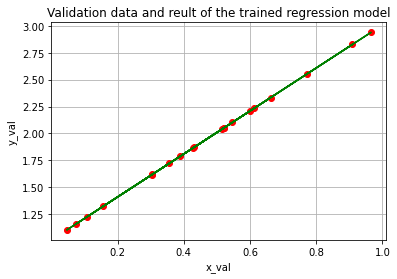

In [35]:
print('Final value of a: ', a)
print('Final value of b: ', b)

plt.plot(x_test, y_test, 'ro')
plt.title('Validation data and reult of the trained regression model')
plt.grid()
plt.xlabel('x_val')
plt.ylabel('y_val')

# Final regression model
yhat = a + b * x_test

#Note, that if you wish, for some reason, to use pytorch only for mathematical operations without back-propagation,
#you can use with torch.no_grad() context manager, in which case computational graphs are not created and torch.
#tensors and np.ndarrays can be used interchangeably.
with torch.no_grad():  
    plt.plot(x_test, yhat, 'g')